#Question 1
-Bootstrapping: Bootstrapping is a resampling method used in statistics. We get the same size of sample repeatedly with replacement from the original data.This makes the sample estimate more accurately when underlying distribution is unknown or the sample size is small.
-Standard Deviation: This is a measure of the amount of variation of the values of a variable about its mean.It tells the fluctuation of the sample mean to the true population mean.
-Standard Error of the mean: It measures how far the sample mean of the data is likely to be from the true population mean.
-Difference: Standard deviation measures the spread of the datapoints, while the standard error of mean relects the variation of the sample mean to the population mean, it measures the accuracy of the sample.

Q1 Chat History with ChatGPT

please provide me a summary of our chat
ChatGPT says：
ChatGPT
In our chat, we discussed the following concepts:

Bootstrapping: A statistical resampling technique used to estimate the distribution of a sample statistic by drawing many samples with replacement from the original data. It helps in estimating the accuracy (such as confidence intervals) of sample statistics, particularly when the underlying distribution is unknown or the sample size is small.

Standard Error of the Mean (SEM) vs. Standard Deviation (SD):

Standard Deviation (SD) measures the spread or variability of individual data points around the sample mean, giving insight into how spread out the data is.
Standard Error of the Mean (SEM) measures the precision of the sample mean as an estimate of the population mean. It indicates how much the sample mean is likely to vary if you took multiple samples from the population. SEM decreases with a larger sample size.
I also provided examples to help clarify the distinctions between these two concepts, emphasizing that SD captures variability in the data, while SEM captures the reliability of the sample mean.


https://chatgpt.com/share/66fe29b7-414c-8002-b4f4-7f7563d9f68b





#Question 2
Firstly, we need to caculate the standard error of mean, then we need to determine the critical value. Depends on the sample size, we choose to use z-scaore or t-score. After that, we try to calculate the confidence interval, using CI= x bar ± (z/t×SEM). With boostrapped sample, we try to obtain the bootstrapped mean, then we calculate standard error of this mean, and finally construct a confidence interval.

Question 2 Chat history with ChatGPT

please provide me a summary of our chat
ChatGPT says：
ChatGPT
In this conversation, we discussed how to create a 95% confidence interval using the standard error of the mean (SEM). The key steps involve:

Calculating the SEM as the sample standard deviation divided by the square root of the sample size.
Using a critical value (1.96 for large samples or a t-score for smaller samples) to calculate the confidence interval.
Constructing the confidence interval around the sample mean as 
𝑥
ˉ
±
(
𝑧
×
𝑆
𝐸
𝑀
)
x
ˉ
 ±(z×SEM).
We also covered how to apply bootstrapping in this context by generating multiple bootstrapped sample means, calculating the SEM from these, and then constructing a confidence interval based on the bootstrapped sample means. This approach helps to cover approximately 95% of the bootstrapped sample means, offering a flexible method that doesn't rely on strict normality assumptions.




https://chatgpt.com/share/66fe9673-dcf4-8002-89c0-fa5596238afa



#Question 3
Firstly, use pd.read_csv to load our sample data, then we need to construct our repeats number and sample_size number which is the same as the original data. Using np.zeros to make an array to save the values, then use np.random.seed to create our beginning vaalue, to make sure when we run the code and get the same result. After that, use np.random.choice to get sample from the original sample, with replace. Finally, use my_bootstrapped_sample.mean() to calculate the sample mean of bootstrapped sample. Finally, use np.quatile to calculate the 0.025 and 0.975 quartile of our bootstrapped sample.

In [12]:
#Question 4

import pandas as pd
import numpy as np

# Load the dataset
url = "https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-05-05/villagers.csv"
villagers_data = pd.read_csv(url)

# Assign numeric codes to the 'species' column
villagers_data['species_code'] = villagers_data['species'].astype('category').cat.codes

# Define the bootstrap function
def bootstrap_ci(data, n_bootstrap=1000, ci=95):
    np.random.seed(42)
    boot_means = []
    
    # Perform bootstrap sampling
    for _ in range(n_bootstrap):
        sample = np.random.choice(data, size=len(data), replace=True)
        boot_means.append(np.mean(sample))
    
    # Calculate the confidence interval
    lower_bound = np.percentile(boot_means, (100 - ci) / 2)
    upper_bound = np.percentile(boot_means, 100 - (100 - ci) / 2)
    
    return lower_bound, upper_bound

# Calculate 95% confidence interval for 'species_code'
bootstrap_ci_result = bootstrap_ci(villagers_data['species_code'])

# Display the result
print("95% Bootstrap Confidence Interval for 'species_code':", bootstrap_ci_result)


95% Bootstrap Confidence Interval for 'species_code': (16.081713554987214, 18.061381074168796)


Question 4 Chat history with ChatGPT

Please provide me a summary of our chat
ChatGPT says：
ChatGPT
Here's a summary of our chat:

You initially provided a link to the Animal Crossing villagers dataset and asked for help calculating a 95% bootstrap confidence interval for the population mean using Python.
After reviewing the dataset, we realized it does not have numeric columns suitable for calculating the mean directly. Therefore, I suggested encoding a categorical column (species) into numeric codes to perform the analysis.
I provided Python code to calculate a 95% bootstrap confidence interval based on the species column's numeric codes.
You mentioned that the code did not give the desired output, so I revised the code to ensure it outputs the result correctly when executed.
Let me know if you need further assistance!

https://chatgpt.com/share/66feac5b-7474-8002-8a2e-7e01d5dfc815

#Question 5
Because the population parameter is always fixed and unknown for us, since the entirepopulation is dufficult for us to research about it.Sample statistics takes sample to represent the population, itcan help us extimate the population.Distinguish these two parameter helps us clarify that the confidence interval is providing an estimate of the population parameter based on the sample statistic, accounting for the natural variability between samples.

#Question 6
Imagine we're trying to figure out something about a huge group of people, but we only have a small group of them to work with. Bootstrapping is like saying, "Okay, I know I don't have everyone, but maybe I can still get a good idea if I shuffle around my small group enough times."

Here’s how it works: Bootstrapping takes our small sample of data and then resamples from that sample over and over. We’re not going back to the city to get new people; We’re just picking from the 100 we already have. Each time we pick, we could pick the same person more than once, this is called sampling with replacement. We do this like thousands of times, and for each time, we calculate the statistic we're interested in—like the average height in each resample.

The main purpose of bootstrapping is to get an idea of the uncertainty or variability in our data without having to rely on complex math formulas or making assumptions about the population. So, instead of saying, “I only have this one sample, and I have no idea how confident I can be about my conclusions,” bootstrapping lets us use the data we have to simulate multiple scenarios and see how much those conclusions might change.

Now, let’s say we have a hypothesis about the average height of the entire population, and we have our sample of 100 people. Bootstrapping helps us see if our guess is reasonable by taking that sample, resampling from it, and seeing what range of averages we get from the bootstrapped samples.

If the range of averages from the bootstrapped samples includes something close to the hypothesis, then our guess might be plausible. But if none of the resampled averages come close to our hypothesis, we might rethink our guess. Essentially, we're using the data we have to test how likely our hypothesis is, based on the variability and patterns in our small sample.

#Question 7

Imagine we're testing if a new drug works, and the "null hypothesis" is the assumption that the drug has no effect (on average). When we create a confidence interval, we're basically trying to estimate a range of possible values for the drug's true from our study.

Now, if this confidence interval includes zero, it means that one possible value for the true effect could be zero—meaning the drug might not have any effect at all. Since zero is in the mix of possible outcomes, we can't confidently say that the drug does something. This is why we "fail to reject the null hypothesis"—we haven't found strong enough evidence to prove the drug works (or has an effect).

On the other hand, if the confidence interval does not include zero—let’s say the whole range is above zero—this would suggest that the true effect of the drug is likely something positive. In this case, we could say there’s enough evidence to "reject the null hypothesis" and conclude that the drug probably does have an effect.

So, the key is whether zero is within the range of possible outcomes. If it is, we can’t reject the idea that the drug might do nothing. If it’s not, we can more confidently say the drug is having an impact.

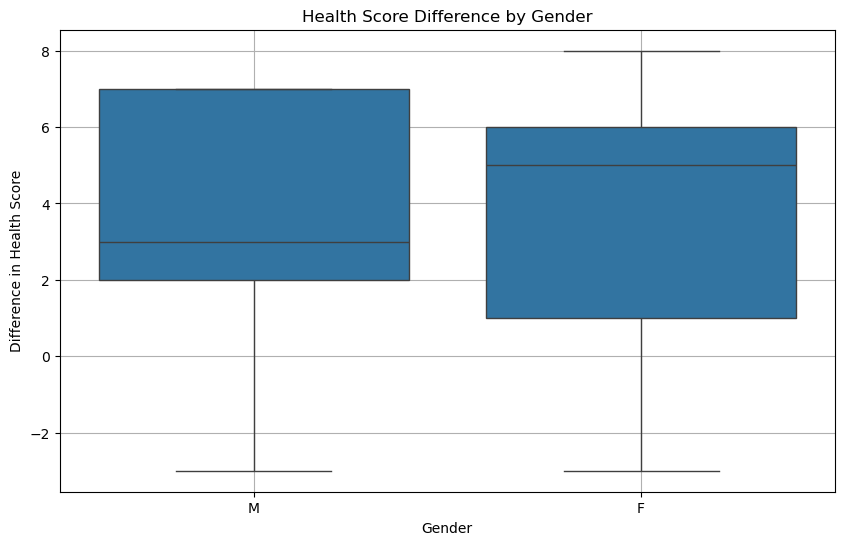

Mean of Differences: 3.30
Standard Deviation of Differences: 4.03
T-statistic: 2.59, P-value: 0.0292
95% Confidence Interval for the Mean Difference: [0.8 5.6]
Reject the null hypothesis: There is significant evidence to suggest the vaccine has an effect.


In [8]:
#Question 8

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set random seed for reproducibility
np.random.seed(329)

# Load the data
data = {
    "PatientID": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "Age": [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    "Gender": ["M", "F", "M", "F", "M", "F", "M", "F", "M", "F"],
    "InitialHealthScore": [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    "FinalHealthScore": [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}

df = pd.DataFrame(data)

# Calculate the differences
df['Difference'] = df['FinalHealthScore'] - df['InitialHealthScore']

# Data Visualization
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Difference', data=df)
plt.title('Health Score Difference by Gender')
plt.ylabel('Difference in Health Score')
plt.xlabel('Gender')
plt.grid()
plt.show()

# Quantitative Analysis
mean_difference = df['Difference'].mean()
std_difference = df['Difference'].std(ddof=1)
n = df['Difference'].count()

# Perform paired t-test
t_statistic, p_value = stats.ttest_rel(df['FinalHealthScore'], df['InitialHealthScore'])
print(f"Mean of Differences: {mean_difference:.2f}")
print(f"Standard Deviation of Differences: {std_difference:.2f}")
print(f"T-statistic: {t_statistic:.2f}, P-value: {p_value:.4f}")

# Bootstrapping to calculate confidence interval
bootstraps = 10000
boot_means = np.empty(bootstraps)

for i in range(bootstraps):
    boot_sample = np.random.choice(df['Difference'], size=n, replace=True)
    boot_means[i] = boot_sample.mean()

# Calculate the 95% confidence interval
conf_int = np.percentile(boot_means, [2.5, 97.5])
print(f"95% Confidence Interval for the Mean Difference: {conf_int}")

# Findings and Discussion
# Null Hypothesis: H0: The vaccine has no effect (mean difference = 0)
# Alternative Hypothesis: H1: The vaccine has an effect (mean difference ≠ 0)

if p_value < 0.05:
    print("Reject the null hypothesis: There is significant evidence to suggest the vaccine has an effect.")
else:
    print("Fail to reject the null hypothesis: There is no significant evidence to suggest the vaccine has an effect.")

# Further Considerations
# Discuss limitations, assumptions, and potential improvements in methodology

# Save the DataFrame to a CSV file (optional)
df.to_csv('vaccine_data_analysis.csv', index=False)


#Question 9
Yes